# 특정 기간 혹은 날에 대한 영화 평점 그래프 그리기
* pd.date_range() 변경하기
* pivot_table()과 query() 이용하기

# 201701562 송병준

## 환경설정

In [43]:
font_family = 'NanumBarunGothic' # 맑은고딕이 없어요 ㅜㅜ
date_start = '2021-10-01'
date_period = 30

## 영화 평점 데이터 가져오기

In [44]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm

import time

date_list = pd.date_range(date_start, periods=date_period, freq='D')

movie_title = []
movie_point = []
movie_date = []

for today in tqdm(date_list):
    url = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date=" + (today.strftime('%Y%m%d'))
    html = urlopen(url)
    
    soup = BeautifulSoup(html.read(), "html.parser")
    
    time.sleep(3)
    
    titles = soup.find_all('div', {'class': 'tit5'})
    points = soup.find_all('td', {'class': 'point'})
    
    titles_text = []
    points_text = []
    date = []
    for t, p in zip(titles, points):
        titles_text.append(t.text.strip(' \n'))
        points_text.append(float(p.text))
        date.append(today)
        
    movie_title += titles_text
    movie_point += points_text
    movie_date += date
    
# print(movie_point)

  0%|          | 0/30 [00:00<?, ?it/s]

## DataFrame으로 만들기

In [45]:
import pandas as pd

frame = pd.DataFrame({'date': movie_date, 'title': movie_title, 'point': movie_point})
frame

,date,title,point
0,2021-10-01,밥정,9.63
1,2021-10-01,그린 북,9.59
2,2021-10-01,가버나움,9.59
3,2021-10-01,디지몬 어드벤처 라스트 에볼루션 : 인연,9.54
4,2021-10-01,원더,9.53
...,...,...,...
1495,2021-10-30,쉰들러 리스트,9.37
1496,2021-10-30,아이 캔 스피크,9.37
1497,2021-10-30,동주,9.37
1498,2021-10-30,클레멘타인,9.37


## pivot_table() 이용하기

In [46]:
import numpy as np

movie_point_frame = pd.pivot_table(frame, values=['point'], index=['title'], aggfunc=np.mean)
movie_point_frame_sort = movie_point_frame.sort_values(by='point', ascending=False)
movie_point_frame_sort.head(10)

,point
title,
밥정,9.618333
그린 북,9.590000
가버나움,9.590000
디지몬 어드벤처 라스트 에볼루션 : 인연,9.539333
원더,9.529000
베일리 어게인,9.524333
아일라,9.510000
극장판 바이올렛 에버가든,9.499667
먼 훗날 우리,9.497333


## 그래프 그리기 1. 상위 10개의 영화 점수 평균 그리기

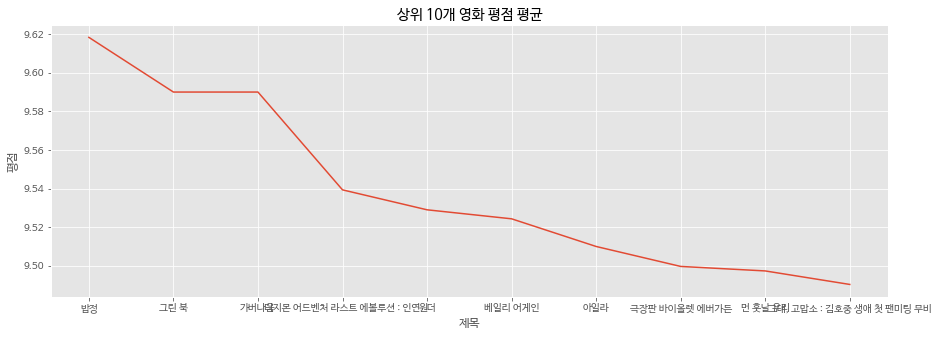

In [47]:
import matplotlib.pyplot as plt

plt.rc('font', family = font_family)
plt.rcParams['axes.unicode_minus'] = False
plt.style.use("ggplot")

plt.figure(figsize=(15,5))
plt.plot(movie_point_frame_sort[:10]['point'])
plt.title('상위 10개 영화 평점 평균')
plt.xlabel('제목')
plt.ylabel('평점')
plt.show()

## query() 이용하기

In [48]:
input_title = input()
search_movie = frame.query("title == ['{}']".format(input_title))

## 그래프 그리기 2. 특정 영화 평점 추이 살펴보기

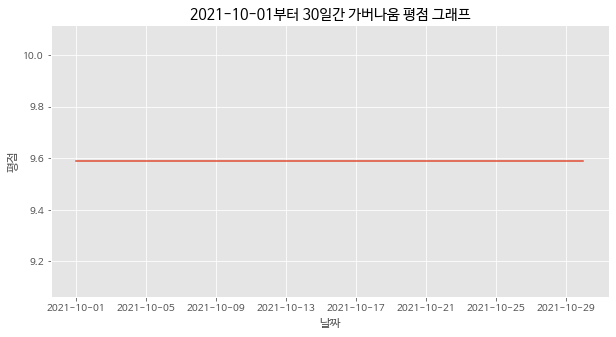

In [49]:
import matplotlib.pyplot as plt

plt.rc('font', family = font_family)
plt.rcParams['axes.unicode_minus'] = False
plt.style.use("ggplot")

plt.figure(figsize=(10,5))
plt.plot(search_movie['date'], search_movie['point'])
plt.title('{}부터 {}일간 {} 평점 그래프'.format(date_start, date_period, input_title))
plt.xlabel('날짜')
plt.ylabel('평점')
plt.show()